<a href="https://colab.research.google.com/github/shaynyx/marvel-level-2/blob/main/task_6_hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hyperparameter Tuning**
Hyperparameter tuning is the process of selecting the optimal values for a machine learning model’s hyperparameters. Hyperparameters are settings that control the learning process of the model, such as the learning rate, the number of neurons in a neural network, or the kernel size in a support vector machine. The goal of hyperparameter tuning is to find the values that lead to the best performance on a given task.

 Models can have many hyperparameters and finding the best combination of parameters can be treated as a search problem. The two best strategies for Hyperparameter tuning are:

**GridSearchCV**

**RandomizedSearchCV**

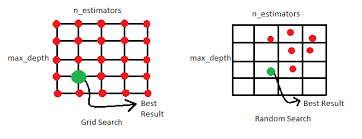



# Hyperparameter Tuning with SVC

In [1]:
# importing the dependencies
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [6]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [8]:
df=pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df['label']=breast_cancer_dataset.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
X=df.drop(columns='label', axis=1)
Y=df['label']

In [13]:
 X = np.asarray(X)
 Y = np.asarray(Y)

In [15]:
model=SVC()
parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
}

# **GridSearchCV**

Grid search can be considered as a “brute force” approach to hyperparameter optimization. We fit the model using all possible combinations after creating a grid of potential discrete hyperparameter values. We log each set’s model performance and then choose the combination that produces the best results. This approach is called GridSearchCV, because it searches for the best set of hyperparameters from a grid of hyperparameters values.

In [16]:
classifier = GridSearchCV(model, parameters, cv=5)

In [17]:
classifier.fit(X,Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [24]:
best_parameters = classifier.best_params_
print(best_parameters)

{'C': 10, 'kernel': 'linear'}


In [22]:

highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9525694767893185


In [19]:
results=pd.DataFrame(classifier.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.416877,0.517245,0.001249,0.000099,1,linear,"{'C': 1, 'kernel': 'linear'}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
1,0.004043,0.000122,0.001287,0.000059,1,poly,"{'C': 1, 'kernel': 'poly'}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,12
2,0.005194,0.000612,0.001959,0.000120,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,11
3,0.017372,0.002560,0.004641,0.001033,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,13
4,3.041359,0.730616,0.001347,0.000273,5,linear,"{'C': 5, 'kernel': 'linear'}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2


In [23]:
grid_search_result = results[['param_C','param_kernel','mean_test_score']]
grid_search_result

,param_C,param_kernel,mean_test_score
0,1,linear,0.945536
1,1,poly,0.908663
2,1,rbf,0.912172
3,1,sigmoid,0.460441
4,5,linear,0.950815
5,5,poly,0.922729
6,5,rbf,0.931501
7,5,sigmoid,0.411178
8,10,linear,0.952569
9,10,poly,0.920975


Highest Accuracy = 95.2%

Best Parameters = {'C':10, 'kernel':'linear'}

# **RandomizedSearchCV**

As the name suggests, the random search method selects values at random as opposed to the grid search method’s use of a predetermined set of numbers. Every iteration, random search attempts a different set of hyperparameters and logs the model’s performance. It returns the combination that provided the best outcome after several iterations. This approach reduces unnecessary computation.

In [25]:
classifier=RandomizedSearchCV(model,parameters,cv=5)

In [26]:
classifier.fit(X,Y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [28]:
results=pd.DataFrame(classifier.cv_results_)

In [29]:
best_parameters = classifier.best_params_
print(best_parameters)

{'kernel': 'linear', 'C': 10}


In [30]:
best_accuracy = classifier.best_score_
print(best_accuracy)

0.9525694767893185


In [32]:
randomized_search_result = results[['param_C','param_kernel','mean_test_score']]
randomized_search_result

,param_C,param_kernel,mean_test_score
0,20,rbf,0.920944
1,20,poly,0.919221
2,10,linear,0.952569
3,20,linear,0.949061
4,5,sigmoid,0.411178
5,1,poly,0.908663
6,10,poly,0.920975
7,10,rbf,0.922714
8,5,rbf,0.931501
9,1,linear,0.945536
